# Regresión Lineal Múltiple

## Importamos nuestras librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importamos nuestro Conjunto de Datos (Dataset)

In [32]:
dataset = pd.read_csv('Teacher_Salary_Data.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, -1].values
dataset

,id,grado,tiempo_completo,years,h_basico,afp,jubilacion,total
0,1,BA,1.0,5.0,45388,3472.18,7688.73,56548.91
1,2,MA,1.0,15.0,60649,4639.65,10273.94,75562.59
2,3,MA,1.0,16.0,60649,4639.65,10273.94,75562.59
3,4,BA,1.0,10.0,54466,4166.65,9226.54,67859.19
4,5,BA,1.0,26.0,65360,5000.04,11071.98,81432.02
...,...,...,...,...,...,...,...,...
66,68,MA,1.0,7.0,49279,3769.84,8347.86,61396.70
67,69,BA,1.0,2.0,38968,2981.05,6601.18,48550.23
68,70,BA,1.0,31.0,65360,5000.04,11071.98,81432.02
69,71,MA,1.0,5.5,48330,3697.24,8187.10,60214.34


In [33]:
print(X)

[['BA' 1.0 5.0]
 ['MA' 1.0 15.0]
 ['MA' 1.0 16.0]
 ['BA' 1.0 10.0]
 ['BA' 1.0 26.0]
 ['BA' 1.0 28.5]
 ['BA' 1.0 12.0]
 ['MA' 1.0 32.0]
 ['BA' 1.0 25.0]
 ['BA' 1.0 12.0]
 ['BA' 1.0 0.0]
 ['BA' 1.0 7.5]
 ['BA' 1.0 40.0]
 ['BA' 1.0 4.0]
 ['MA' 1.0 7.0]
 ['BA' 1.0 34.0]
 ['MA' 1.0 36.0]
 ['MA' 1.0 20.0]
 ['MA' 1.0 28.5]
 ['MA' 1.0 8.0]
 ['MA' 1.0 4.0]
 ['BA' 1.0 28.0]
 ['BA' 1.0 25.0]
 ['MA' 1.0 9.0]
 ['BA' 1.0 33.0]
 ['BA' 1.0 9.0]
 ['MA' 1.0 31.0]
 ['BA' 1.0 32.0]
 ['MA' 1.0 8.0]
 ['BA' 1.0 20.0]
 ['MA' 1.0 28.0]
 ['BA' 1.0 16.0]
 ['MA' 1.0 37.0]
 ['MA' 1.0 11.0]
 ['MA' 1.0 17.0]
 ['MA' 0.5 1.0]
 ['MA' 1.0 2.0]
 ['MA' 1.0 3.0]
 ['BA' 1.0 29.0]
 ['BA' 1.0 1.0]
 ['BA' 1.0 19.0]
 ['BA' 1.0 15.0]
 ['BA' 1.0 19.0]
 ['BA' 1.0 18.0]
 ['MA' 1.0 9.0]
 ['MA' 1.0 8.0]
 ['BA' 1.0 3.0]
 ['MA' 1.0 14.0]
 ['BA' 1.0 7.5]
 ['MA' 1.0 8.0]
 ['BA' 1.0 31.0]
 ['MA' 1.0 15.0]
 ['BA' 1.0 3.0]
 ['MA' 1.0 10.5]
 ['BA' 1.0 15.0]
 ['BA' 1.0 0.0]
 ['MA' 1.0 9.0]
 ['BA' 1.0 9.0]
 ['MA' 1.0 13.0]
 ['BA' 1.0 22.0]
 ['

## Codificación de datos categóricos

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
print(X)

[[1.0 0.0 1.0 5.0]
 [0.0 1.0 1.0 15.0]
 [0.0 1.0 1.0 16.0]
 [1.0 0.0 1.0 10.0]
 [1.0 0.0 1.0 26.0]
 [1.0 0.0 1.0 28.5]
 [1.0 0.0 1.0 12.0]
 [0.0 1.0 1.0 32.0]
 [1.0 0.0 1.0 25.0]
 [1.0 0.0 1.0 12.0]
 [1.0 0.0 1.0 0.0]
 [1.0 0.0 1.0 7.5]
 [1.0 0.0 1.0 40.0]
 [1.0 0.0 1.0 4.0]
 [0.0 1.0 1.0 7.0]
 [1.0 0.0 1.0 34.0]
 [0.0 1.0 1.0 36.0]
 [0.0 1.0 1.0 20.0]
 [0.0 1.0 1.0 28.5]
 [0.0 1.0 1.0 8.0]
 [0.0 1.0 1.0 4.0]
 [1.0 0.0 1.0 28.0]
 [1.0 0.0 1.0 25.0]
 [0.0 1.0 1.0 9.0]
 [1.0 0.0 1.0 33.0]
 [1.0 0.0 1.0 9.0]
 [0.0 1.0 1.0 31.0]
 [1.0 0.0 1.0 32.0]
 [0.0 1.0 1.0 8.0]
 [1.0 0.0 1.0 20.0]
 [0.0 1.0 1.0 28.0]
 [1.0 0.0 1.0 16.0]
 [0.0 1.0 1.0 37.0]
 [0.0 1.0 1.0 11.0]
 [0.0 1.0 1.0 17.0]
 [0.0 1.0 0.5 1.0]
 [0.0 1.0 1.0 2.0]
 [0.0 1.0 1.0 3.0]
 [1.0 0.0 1.0 29.0]
 [1.0 0.0 1.0 1.0]
 [1.0 0.0 1.0 19.0]
 [1.0 0.0 1.0 15.0]
 [1.0 0.0 1.0 19.0]
 [1.0 0.0 1.0 18.0]
 [0.0 1.0 1.0 9.0]
 [0.0 1.0 1.0 8.0]
 [1.0 0.0 1.0 3.0]
 [0.0 1.0 1.0 14.0]
 [1.0 0.0 1.0 7.5]
 [0.0 1.0 1.0 8.0]
 [1.0 0.0 1.0 31.0]

## Segmentamos el conjunto de datos en un conjunto de entrenamiento y otro conjunto de prueba o evaluación

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Entrenamiento del modelo de regresión lineal múltiple con el conjunto de datos

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicción de los resultados del conjunto de pruebas

In [38]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[87355.1  85007.76]
 [84321.63 81432.02]
 [60405.15 60687.79]
 [77488.35 81432.02]
 [84426.55 85007.76]
 [71736.18 75562.59]
 [88331.29 85007.76]
 [74559.8  76908.16]
 [73688.54 77924.81]
 [83450.37 85007.76]
 [65879.08 68477.15]
 [64902.9  66116.18]
 [68702.71 74646.85]
 [71631.26 74646.85]
 [67831.45 73199.12]]


## Visualización de los resultados del conjunto de entrenamiento

In [39]:
import statsmodels.regression.linear_model as lm
X = np.append(arr = np.ones((71, 1)).astype("int64"), values = X, axis = 1)
SL = 0.05

In [40]:
X_opt = X[:, [0, 1, 2, 3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     152.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.65e-30
Time:                        20:52:32   Log-Likelihood:                -696.70
No. Observations:                  71   AIC:                             1401.
Df Residuals:                      67   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8082.0629   6138.181     -1.317      0.192   -2.03e+04    4169.798
x1         -6089.5386   3181.386     -1.914      0.060   -1.24e+04     260.535
x2         -1992.5243   3053.406     -0.653      0.516   -8087.149    4102.100
x3          6.781e+04   9352.129      7.251      0.000    4.91e+04    8.65e+04
x4           962.6624     51.318     18.759      0.000     860.231    1065.093
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.062
Skew:                          -0.609   Prob(JB):                       0.0796
Kurtosis:                       2.525   Cond. No.                     6.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
X_opt = X[:, [1, 2, 3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     152.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.65e-30
Time:                        20:54:40   Log-Likelihood:                -696.70
No. Observations:                  71   AIC:                             1401.
Df Residuals:                      67   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.417e+04   9288.363     -1.526      0.132   -3.27e+04    4368.048
x2         -1.007e+04   9158.597     -1.100      0.275   -2.84e+04    8206.049
x3          6.781e+04   9352.129      7.251      0.000    4.91e+04    8.65e+04
x4           962.6624     51.318     18.759      0.000     860.231    1065.093
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.062
Skew:                          -0.609   Prob(JB):                       0.0796
Kurtosis:                       2.525   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X_opt = X[:, [2, 3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              5690.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                    1.49e-81
Time:                        20:55:05   Log-Likelihood:                         -697.91
No. Observations:                  71   AIC:                                      1402.
Df Residuals:                      68   BIC:                                      1409.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3800.8862   1094.077      3.474      0.001    1617.689    5984.083
x2          5.365e+04   1151.142     46.604      0.000    5.14e+04    5.59e+04
x3           967.2286     51.728     18.698      0.000     864.006    1070.451
==============================================================================
Omnibus:                        5.432   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.006
Skew:                          -0.580   Prob(JB):                       0.0818
Kurtosis:                       2.410   Cond. No.                         48.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_opt = X[:, [3, 4]].tolist()
"""X_opt = np.array(X_opt, dtype = "float64")"""
regression_OLS = lm.OLS(endog = y, exog = X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7350.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):                    3.96e-81
Time:                        20:55:32   Log-Likelihood:                         -703.71
No. Observations:                  71   AIC:                                      1411.
Df Residuals:                      69   BIC:                                      1416.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.569e+04   1065.759     52.256      0.000    5.36e+04    5.78e+04
x2           946.0192     55.334     17.097      0.000     835.631    1056.407
==============================================================================
Omnibus:                        5.082   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.073
Skew:                          -0.644   Prob(JB):                       0.0791
Kurtosis:                       2.765   Cond. No.                         34.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X = dataset.iloc[:, [3]].values
y = dataset.iloc[:, -1].values
X

array([[ 5. ],
       [15. ],
       [16. ],
       [10. ],
       [26. ],
       [28.5],
       [12. ],
       [32. ],
       [25. ],
       [12. ],
       [ 0. ],
       [ 7.5],
       [40. ],
       [ 4. ],
       [ 7. ],
       [34. ],
       [36. ],
       [20. ],
       [28.5],
       [ 8. ],
       [ 4. ],
       [28. ],
       [25. ],
       [ 9. ],
       [33. ],
       [ 9. ],
       [31. ],
       [32. ],
       [ 8. ],
       [20. ],
       [28. ],
       [16. ],
       [37. ],
       [11. ],
       [17. ],
       [ 1. ],
       [ 2. ],
       [ 3. ],
       [29. ],
       [ 1. ],
       [19. ],
       [15. ],
       [19. ],
       [18. ],
       [ 9. ],
       [ 8. ],
       [ 3. ],
       [14. ],
       [ 7.5],
       [ 8. ],
       [31. ],
       [15. ],
       [ 3. ],
       [10.5],
       [15. ],
       [ 0. ],
       [ 9. ],
       [ 9. ],
       [13. ],
       [22. ],
       [14. ],
       [ 7. ],
       [ 7. ],
       [29. ],
       [16. ],
       [23. ],
       [ 7

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
X

array([[ 5. ],
       [15. ],
       [16. ],
       [10. ],
       [26. ],
       [28.5],
       [12. ],
       [32. ],
       [25. ],
       [12. ],
       [ 0. ],
       [ 7.5],
       [40. ],
       [ 4. ],
       [ 7. ],
       [34. ],
       [36. ],
       [20. ],
       [28.5],
       [ 8. ],
       [ 4. ],
       [28. ],
       [25. ],
       [ 9. ],
       [33. ],
       [ 9. ],
       [31. ],
       [32. ],
       [ 8. ],
       [20. ],
       [28. ],
       [16. ],
       [37. ],
       [11. ],
       [17. ],
       [ 1. ],
       [ 2. ],
       [ 3. ],
       [29. ],
       [ 1. ],
       [19. ],
       [15. ],
       [19. ],
       [18. ],
       [ 9. ],
       [ 8. ],
       [ 3. ],
       [14. ],
       [ 7.5],
       [ 8. ],
       [31. ],
       [15. ],
       [ 3. ],
       [10.5],
       [15. ],
       [ 0. ],
       [ 9. ],
       [ 9. ],
       [13. ],
       [22. ],
       [14. ],
       [ 7. ],
       [ 7. ],
       [29. ],
       [16. ],
       [23. ],
       [ 7

In [53]:
X_train

array([[ 0. ],
       [ 5.5],
       [ 7. ],
       [18. ],
       [26. ],
       [23. ],
       [31. ],
       [16. ],
       [19. ],
       [ 7.5],
       [10. ],
       [15. ],
       [ 8. ],
       [ 0. ],
       [15. ],
       [ 8. ],
       [10.5],
       [ 9. ],
       [37. ],
       [ 7. ],
       [31. ],
       [ 8. ],
       [20. ],
       [ 3. ],
       [ 1. ],
       [28.5],
       [ 5. ],
       [34. ],
       [28.5],
       [36. ],
       [ 4. ],
       [ 7. ],
       [25. ],
       [ 4. ],
       [ 9. ],
       [ 3. ],
       [20. ],
       [14. ],
       [ 3. ],
       [29. ],
       [ 1. ],
       [29. ],
       [15. ],
       [13. ],
       [40. ],
       [ 7. ],
       [33. ],
       [12. ],
       [ 9. ],
       [ 2. ],
       [28. ],
       [12. ],
       [ 2. ],
       [16. ],
       [14. ],
       [ 9. ]])

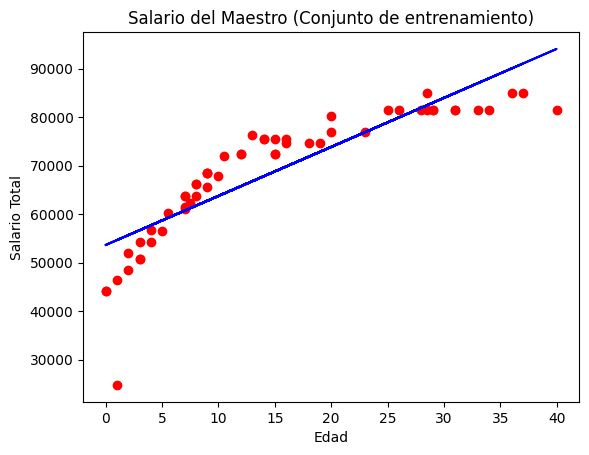

In [54]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salario del Maestro (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario Total')
plt.show()

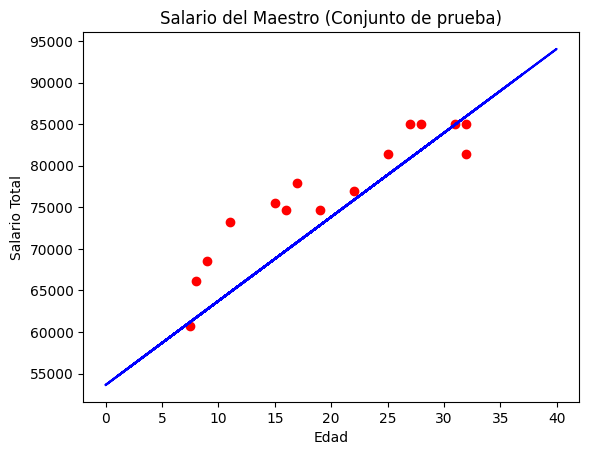

In [55]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salario del Maestro (Conjunto de prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Total')
plt.show()